# Installations and Imports

In [1]:
!pip install seaborn
!pip install scipy

In [2]:
import pandas as pd
import re
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sb
import random
import warnings
import operator

#Scikit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [3]:
#Ignores warnings when running kernels.
#Retrieved from: https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
#Future Warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Question 1: Data Cleaning & Encoding

###### The following function in the below cell will clean the data for Question 2.  This data will primarily be used for plotting graphs to analyze various trends.

This data for Question 2 strips everything from the original source file except for the first 12 columns.  This is because these columns seemed to be the most relevant when drawing comparisons and performing various analyses.

For example, it's a good idea to keep information such as sex, country, age and title.

In [4]:
def original_clean_data():
    #Headers from file to keep
    headers = ["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q12_MULTIPLE_CHOICE"]

    #Extract data with desired headings
    data = pd.read_csv("multipleChoiceResponses.csv")
    clean_data = data.loc[:,headers]

    #Replace Q headers with actual questions 
    new_header = clean_data.iloc[0]
    clean_data = clean_data[1:]
    clean_data.columns = new_header
    
    #Sort salaries into buckets
    clean_data.iloc[:,8].replace("I do not wish to disclose my approximate yearly compensation","A) Did not answer",inplace=True)
    clean_data.iloc[:,8].replace("0-10,000","B) 0-10,000",inplace=True)
    clean_data.iloc[:,8].replace("10-20,000","C) 10-20,000",inplace=True)
    clean_data.iloc[:,8].replace("20-30,000","D) 20-30,000",inplace=True)
    clean_data.iloc[:,8].replace("30-40,000","E) 30-40,000",inplace=True)
    clean_data.iloc[:,8].replace("40-50,000","F) 40-50,000",inplace=True)
    clean_data.iloc[:,8].replace("50-60,000","G) 50-60,000",inplace=True)
    clean_data.iloc[:,8].replace("60-70,000","H) 60-70,000",inplace=True)
    clean_data.iloc[:,8].replace("70-80,000","I) 70-80,000",inplace=True)
    clean_data.iloc[:,8].replace("80-90,000","J) 80-90,000",inplace=True)
    clean_data.iloc[:,8].replace("90-100,000","K) 90-100,000",inplace=True)
    clean_data.iloc[:,8].replace("100-125,000","L) 100-125,000",inplace=True)
    clean_data.iloc[:,8].replace("125-150,000","M) 125-150,000",inplace=True)
    clean_data.iloc[:,8].replace("150-200,000","N) 150-200,000",inplace=True)
    clean_data.iloc[:,8].replace("200-250,000","O) 200-250,000",inplace=True)
    clean_data.iloc[:,8].replace("250-300,000","P) 250-300,000",inplace=True)
    clean_data.iloc[:,8].replace("300-400,000","Q) 300-400,000",inplace=True)
    clean_data.iloc[:,8].replace("400-500,000","R) 400-500,000",inplace=True)
    clean_data.iloc[:,8].replace("500,000+","S) 500,000+",inplace=True) 
    
    #Clean years of experience column
    clean_data.iloc[:,7].replace("2-Jan","1-2",inplace=True)
    clean_data.iloc[:,7].replace("3-Feb","2-3",inplace=True)
    clean_data.iloc[:,7].replace("4-Mar","3-4",inplace=True)
    clean_data.iloc[:,7].replace("4-Mar","3-4",inplace=True)
    clean_data.iloc[:,7].replace("5-Apr","4-5",inplace=True)
    clean_data.iloc[:,7].replace("10-May","5-10",inplace=True)
    clean_data.iloc[:,7].replace("15-Oct","10-15",inplace=True)

    #Create dictionary to store the modes for each heading
    mode_list = {}

    for i in clean_data.columns:
        a = st.mode(clean_data.loc[:,i]) #calculates mode of each column
        mode_list[i] = a #puts mode in dictonary for future use
        clean_data[i] = clean_data[i].replace(np.nan,a) #replace blanks with mode
    
    return clean_data.head(-1)

In [5]:
original_clean_data()

C:\Users\mvass\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,How many years of experience do you have in your current role?,What is your current yearly compensation (approximate $USD)?,Does your current employer incorporate machine learning methods into their business?,What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,Other,0-1,A) Did not answer,I do not know,"Cloud-based data software & APIs (AWS, GCP, Az..."
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"C) 10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G..."
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"B) 0-10,000",I do not know,Local or hosted development environments (RStu...
4,Male,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,Computers/Technology,0-1,A) Did not answer,We are exploring ML methods (and may one day p...,Local or hosted development environments (RStu...
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"B) 0-10,000",I do not know,"Advanced statistical software (SPSS, SAS, etc.)"
6,Male,25-29,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,Computers/Technology,0-1,A) Did not answer,We are exploring ML methods (and may one day p...,Local or hosted development environments (RStu...
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"C) 10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G..."
8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"B) 0-10,000","We recently started using ML methods (i.e., mo...",Local or hosted development environments (RStu...
9,Male,25-29,Turkey,Master’s degree,Engineering (non-computer focused),Not employed,Computers/Technology,0-1,A) Did not answer,We are exploring ML methods (and may one day p...,Other
10,Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"D) 20-30,000","We have well established ML methods (i.e., mod...",Local or hosted development environments (RStu...


###### New cleaned data to be analyzed and encoded.

The program below performs the following cleanup maneuvers:
- Drops any column containing the word TEXT (ie. all OTHER_TEXT columns do not provide any useful information).
- Drops the "Time from Start to Finish (seconds)" column.  This is not indicitive of someone's salary.
- Drops rows that cannot draw any comparisons (ie. people who did not record their annual salary or sex).
- Replaces blank rows with the mode of each column.  This was done, because there weren't too many blanks within the first 12 columns and more data to analyze could be useful in the analysis.
- The upper halfs of each salary bucket were taken so that it may be converted into an integer (ie. it is currently a string)
- Salary buckets were combined in order to increase the machine learning algorithm's accuracy (see Question 4's predictability explanation).
- The feature set (not including the target variables) were encoded to numerical data using one-hot-encoding method.

In [6]:
data = pd.read_csv("multipleChoiceResponses.csv")

#All columns with headers containing the word "TEXT".
#Filter all columns with the word "TEXT" and drop them from the dataframe
drop_words = 'TEXT'
data = data.select_dtypes(include=[object])
drop_text = data.filter(regex = drop_words)
data = data[data.columns.drop(drop_text)]
del data['Time from Start to Finish (seconds)']

#Drops rows that contain this information
data = data[data.iloc[:,8] != 'I do not wish to disclose my approximate yearly compensation']
data = data[data.iloc[:,0] != 'Prefer not to say']
data = data[data.iloc[:,0] != 'Prefer to self-describe']
data = data.drop(data.index[[0]])

#Replaces null data with the mode of each category.  Some modes may also be null.
for i in data.columns:
    try:
        a = st.mode(data.loc[:,i])
        data[i] = data[i].replace(np.nan,a)
    except:
        data[i] = data[i].replace(np.nan,0)

#Clean up Salary Range and convert values into integer
data.iloc[:,8] = [x.split('-')[-1] for x in data.iloc[:,8]]
data.iloc[:,8] = [x.replace(",","") for x in data.iloc[:,8]]

#Merge 300k-400k, 400k-500k, & 500k+ into one range (ie. 100k+)
data.iloc[:,8] = [x.replace("500000+","100000") for x in data.iloc[:,8]]
data.iloc[:,8] = [x.replace("500000","100000") for x in data.iloc[:,8]]
data.iloc[:,8] = [x.replace("400000","100000") for x in data.iloc[:,8]]
data.iloc[:,8] = [x.replace("300000","100000") for x in data.iloc[:,8]]
data.iloc[:,8] = [x.replace("250000","100000") for x in data.iloc[:,8]]
data.iloc[:,8] = [x.replace("200000","100000") for x in data.iloc[:,8]]
data.iloc[:,8] = [x.replace("150000","100000") for x in data.iloc[:,8]]
data.iloc[:,8] = [x.replace("125000","100000") for x in data.iloc[:,8]]

#Merge 60k-90k
data.iloc[:,8] = [x.replace("80000","90000") for x in data.iloc[:,8]]
data.iloc[:,8] = [x.replace("70000","90000") for x in data.iloc[:,8]]

#Merge 30k-60k
data.iloc[:,8] = [x.replace("50000","60000") for x in data.iloc[:,8]]
data.iloc[:,8] = [x.replace("40000","60000") for x in data.iloc[:,8]]

#Merge 10k-30k
data.iloc[:,8] = [x.replace("20000","30000") for x in data.iloc[:,8]]

#Create target variable column (y) -----------------------------------------------------------------------
target_variable = data.iloc[:,8].astype(int)
cl_data = data

#Drop redundant columns
del cl_data['Q9']
del cl_data['Q38_Part_19']
del cl_data['Q38_Part_20']

#Create one hot encoded feature set ---------------------------------------------------------------------- 
feature_set = pd.get_dummies(cl_data)

feature_set.head()

C:\Users\mvass\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Q1_Female,Q1_Male,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,...,Q49_Part_11_None/I do not make my work easy for others to reproduce,Q49_Part_12_Other,Q50_Part_1_Too expensive,Q50_Part_2_Too time-consuming,Q50_Part_3_Requires too much technical knowledge,Q50_Part_4_Afraid that others will use my work without giving proper credit,Q50_Part_5_Not enough incentives to share my work,Q50_Part_6_I had never considered making my work easier for others to reproduce,Q50_Part_7_None of these reasons apply to me,Q50_Part_8_Other
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


###### One Hot Encoding

- One hot encoding was used for the analysis because of its relative simplicity.  OHE essentially repeats columns based on the number of unique values in each set.  If the positional row contains that value, OHE assigns the label a 1.  If it contains anything else, a 0 will be assigned.
- Originally, a label encoder was going to be used since it does not require columns to repeat based on their values.  It was found however, that label encoding may affect the machine learning algorithm since it may assign encoded labels a weighted value.  For instance, if Males = 0 and Females = 1, it may assume that Females have a greater weight, as opposed to treating both values equally.

###### Shows how many participants are in the newly allocated classes

In [7]:
target_variable.value_counts()

10000     7934
30000     3289
60000     2967
100000    2731
90000     1896
Name: Q9, dtype: int64

###### Missing Data Explanation

There is a lot of missing data from the original source file.  
- One possible explanation for this is because each column is listed in multiple choice format.  This means that if a participant selected a particular choice, all other columns pertaining to the same question will be left blank.  As a result, the data is sparsely populated.
- Another possible explanation for the missing data is because participants may have refused to answer the question.  For instance, when asked what their current yearly compensation was, may participants left this field blank.

# Question 2: Exploratory Data Analysis

In [8]:
def male_female_plot():    
    
    #International Males -----------------------------------------------------------------------------------------
    #Look at ONLY males internationally
    int_male = original_clean_data()[original_clean_data().iloc[:,0] == "Male"]

    #Creates list of percentage of males in each salary bucket
    salary_count_male = pd.DataFrame(data = int_male.iloc[:,8].value_counts())
    salary_count_male = list(round((salary_count_male.iloc[:,0]/salary_count_male.iloc[:,0].sum())*100,2))

    # #Create x-axis list: Salary Bucket
    male_salary_list = sorted(list(dict.fromkeys(int_male.iloc[:,8])))

    #International Females ----------------------------------------------------------------------------------------
    #Look at ONLY males internationally
    int_female = original_clean_data()[original_clean_data().iloc[:,0] == "Female"]

    #Creates list of percentage of males in each salary bucket
    salary_count_female = pd.DataFrame(data = int_female.iloc[:,8].value_counts())
    salary_count_female = list(round((salary_count_female.iloc[:,0]/salary_count_female.iloc[:,0].sum())*100,2))

    # #Create x-axis list: Salary Bucket
    female_salary_list = sorted(list(dict.fromkeys(int_female.iloc[:,8])))

    #Plotting data -----------------------------------------------------------------------------------------------
    #Creating new dataframe for SeaBorn plot

    males = []
    females = []

    for i in range(0,19):
        males.append("Male")

    for i in range(0,18):
        females.append("Female")

    df = pd.DataFrame(male_salary_list + female_salary_list)
    df.rename(columns={0: "salary_bucket"},inplace = True)
    df['sex'] = (males + females)
    df['%_of_sex'] = (salary_count_male + salary_count_female)
    df.drop(df[df.iloc[:,0] == 'A) Did not answer'].index, inplace = True) 

    a4_dims = (15, 10)
    fig, ax = plt.subplots(figsize=a4_dims)
    sb.barplot(x='%_of_sex', y='salary_bucket',data = df,hue = 'sex').set_title("Percentage of Male and Female Data Scientists in Salary Bucket")


###### 2. a) i) The following graph analyzes the allocation of males versus females into different salary buckets.

This data compares the percentages of males versus females allocated to different salary buckets.  The percentage was taken as opposed to the actual population, because the number of males in the field far outweighs the number of females (19,430 males to 4,010 females).  Given the trend, it can be concluded that sex is similarly allocated across the distribution, with slight favouritism towards males (ie. in bucket N for instance, the population of males is just under double the population of females).

This is useful to understand, because it shows that for the most part, salary is not entirely indicitive of sex and that there are most certainly other factors coming into play.

The data does not consider those who did not record their salary, as it is meaningless and does not provide any additional information.  The data also only focuses on males and females, and not those who refused to answer.


C:\Users\mvass\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


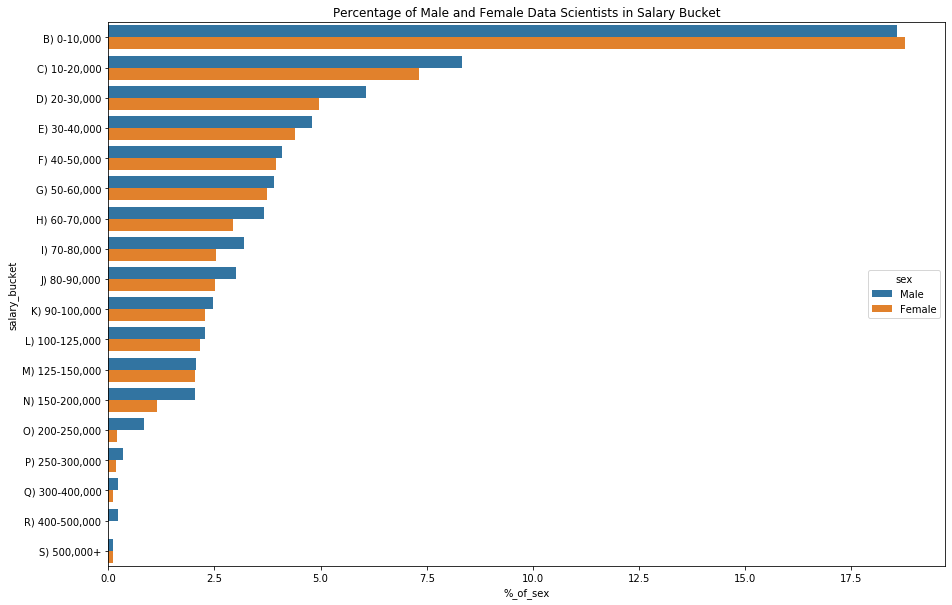

In [9]:
male_female_plot()

In [10]:
def education_plot():
    deg_data = original_clean_data()[original_clean_data().iloc[:,8] != "A) Did not answer"]
    deg_data = deg_data[deg_data.iloc[:,0] != "Prefer not to say"]
    deg_data = deg_data[deg_data.iloc[:,0] != "Prefer to self-describe"]
    deg_data = deg_data[deg_data.iloc[:,3] != "I prefer not to answer"]

    salary_data = [x.split('-')[-1] for x in deg_data.iloc[:,8]]
    salary_data = [x.replace(",","") for x in salary_data]
    salary_data = [x.replace("S) 500000+","600000") for x in salary_data]

    degree_data = deg_data.iloc[:,3]

    sex_data = deg_data.iloc[:,0]

    df = pd.DataFrame(sex_data)
    df.rename(columns={df.columns[0]: "sex"}, inplace = True)
    df['education'] = degree_data
    df['salary'] = pd.to_numeric(salary_data)

    a4_dims = (12, 10)
    fig, ax = plt.subplots(figsize=a4_dims)
    sb.lineplot(x='education', y='salary',data = df,hue = 'sex',ax=ax).set_title("Distribution of Males & Females Based on Education")
    plt.xticks(rotation=30)

###### 2. a) ii) The following graph analyzes the allocation of males and females in different salary buckets based on their educational background. The shaded regions in the line plot show the areas of concentration of people, whereas the solid line shows the average.

Similarly to the plot in part a), the distribution between males and females follows a similar trend.  It is evident however, that males with a higher educational background are more likely to earn more than females.  This is shown in almost every domain plotted.

It is also very interesting to note that people without a formal education past high school have a wide variation of salary ranges.  Males are especially dominant in this domain.  While the average for this hovers around $USD 60,000.00, it can be seen that a small concentration of males actually make as much or more than the average male with a PhD.  

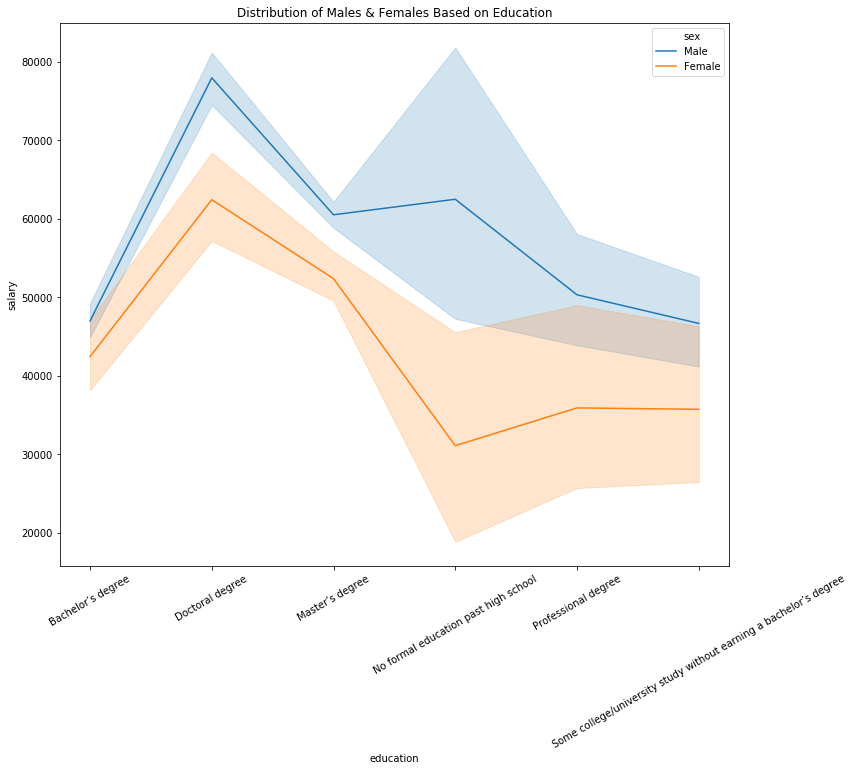

In [11]:
education_plot()

In [12]:
def title_plot():
    
    ttl_data = original_clean_data()[original_clean_data().iloc[:,8] != "A) Did not answer"]
    ttl_data = ttl_data[ttl_data.iloc[:,0] != "Prefer not to say"]
    ttl_data = ttl_data[ttl_data.iloc[:,0] != "Prefer to self-describe"]
    ttl_data = ttl_data[ttl_data.iloc[:,5] != "Not employed"]
    ttl_data = ttl_data[ttl_data.iloc[:,5] != "Other"]

    salary_data = [x.split('-')[-1] for x in ttl_data.iloc[:,8]]
    salary_data = [x.replace(",","") for x in salary_data]
    salary_data = [x.replace("S) 500000+","600000") for x in salary_data]

    title_data = ttl_data.iloc[:,5]

    sex_data = ttl_data.iloc[:,0]

    df = pd.DataFrame(sex_data)
    df.rename(columns={df.columns[0]: "sex"}, inplace = True)
    df['position'] = title_data
    df['salary'] = pd.to_numeric(salary_data)

    a4_dims = (20, 10)
    fig, ax = plt.subplots(figsize=a4_dims)
    sb.barplot(x='position', y='salary',data = df,hue = 'sex',ax=ax).set_title("Distribution of Males & Females Based on Position")
    plt.xticks(rotation=45)

###### 2. a) iii) The following graph plots the distribution of males and females into different salary buckets based on their position and title at their place of employment.

Once again, the distribution of salaries is similar to part a) for both males and females (ie. certain titles have more weight than others, and so the salary will increase for both genders).

It is very interesting to note however, that the average female in certain domains actually makes more than the average male based on their title.  An example of this is with the title "Salesperson", where the average female makes just under double the average male.  It is also shown that small concentrations of females make just under $USD 200,000.00 with this title, whereas this is not the case for males.  

As expected, CO's with both genders make on average, the most out of all other titles.  This makes sense, because they are on top of the heirarchy scale.  It is interesting to note however, that the average male CO makes more than the average female CO.  This can be countered though, as a small concentration of CO females make over USD 200,000.00, whereas a small concentration of CO males only make above USD 150,000.00.

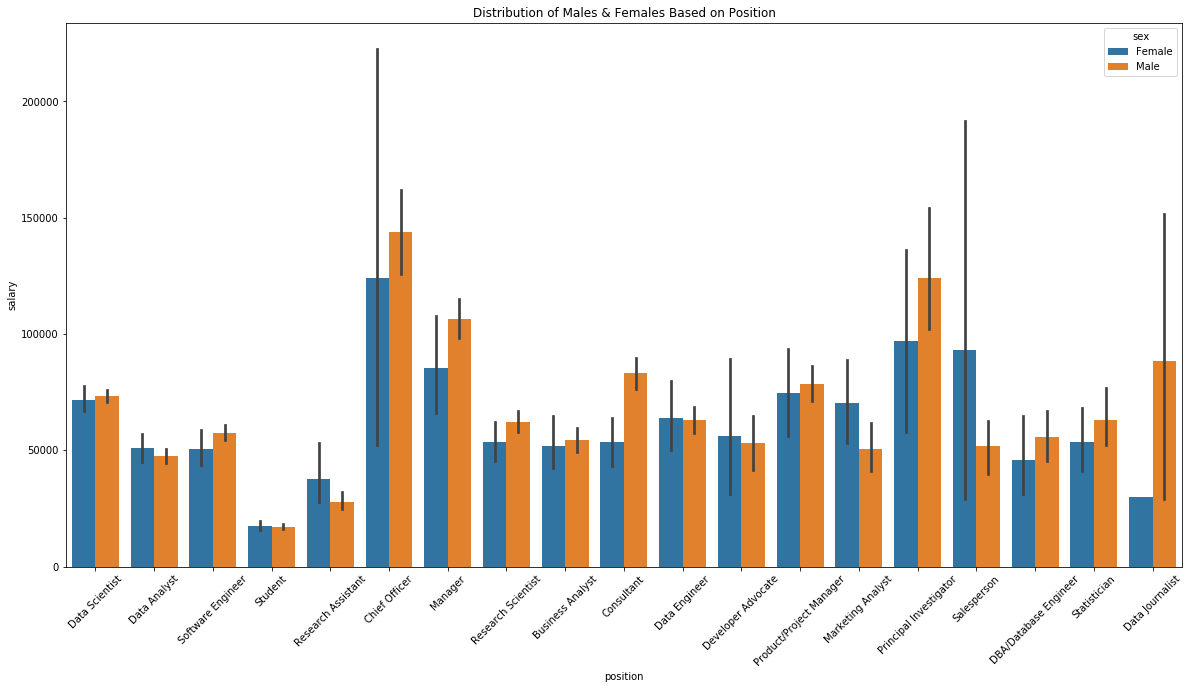

In [13]:
title_plot()

###### 2 b) Given the original structure of the dataset and based on the results from 2 a), the most important features that correlate to an increase in salary lie within the first 12 columns.  Some of the more important features and explanations are listed below:

- While it was shown in graph 2 a) i) that the distribution across all salary buckets was very similar, there was still slight favouritism towards males.  This makes sense, because this is also a male dominant industry.  From graph 2 b) ii), it can also be seen that males when analyzed in unison with education, will have a higher salary than females.  That being said, we are progressing in a society where more female engineers and data scientists are entering the field.  As such, the shift in salary over the next few years can definitely be expected.


- Title and role most definitely correlate to a higher salary.  On a heirarchy level, it can be seen from graph 2 a) iii) that CO's and managers make more than the average person with other various titles. 


- While this was not analyzed in the above, it can be presumed that age and years of experience also play significant roles in determining salary.  Experience is also directly proportional to age since, generally speaking, the older you are, the more experience you will have.  People can leverage this experience with a higher salary.

# Question 3: Feature Selection Process

#### LASSO Regression and PCA Implementation

Feature Selection:
Feature selection is a critical part in supervised machine learning, because it allows for the most important information to be extracted from the dataset while ultimately reducing overfitting.  This is essential, because you are training the model on the most critical, relevant information that is required to make accurate predictions.

Explanation:
For this next section, LASSO regression will be applied to the dataset, followed by principle component analysis (PCA).  

LASSO follows a regularization process which penalizes sizable variables, continuously applying these penalties and ultimately reducing the regression weight coefficients to as close to 0 as possible (Retrieved from https://stats.stackexchange.com/questions/17251/what-is-the-lasso-in-regression-analysis).

PCA ultimately reduces the number of feature dimensions in a set.  It converts correlated variables into sets of uncorrelated variables known as principle components.  125 columns of data were specified in the program, since that represents almost a quarter of the entire original set, which seems reasonable given such a large database (Retrieved from https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c).   

In [14]:
#LASSO Regression ----------------------------------------------------------------------
#The best alpha parameter is selected by cross-validation
lasso_data = linear_model.LassoCV(cv=10, random_state=0, max_iter=10000)
lasso_data = lasso_data.fit(feature_set, target_variable)

# Selecting the features whose coefficients are not zero
fs = (lasso_data.coef_ != 0)
feature_set_improved = feature_set.loc[:, fs]
feature_set_improved.head()

,Q1_Female,Q1_Male,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_40-44,Q2_45-49,Q2_50-54,Q2_55-59,...,Q49_Part_8_Define all random seeds,Q49_Part_9_Define relative rather than absolute file paths,Q49_Part_10_Include a text file describing all dependencies,Q49_Part_11_None/I do not make my work easy for others to reproduce,Q50_Part_2_Too time-consuming,Q50_Part_3_Requires too much technical knowledge,Q50_Part_4_Afraid that others will use my work without giving proper credit,Q50_Part_5_Not enough incentives to share my work,Q50_Part_6_I had never considered making my work easier for others to reproduce,Q50_Part_7_None of these reasons apply to me
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
5,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [15]:
#PCA Dimension Reduction ---------------------------------------------------------------
x_fs = StandardScaler().fit_transform(feature_set_improved)
pca = PCA(n_components = 125)
pca = pca.fit_transform(x_fs)

x_pca_data = pd.DataFrame(data = pca)
x_pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-5.427084,-0.973495,-1.222806,3.912671,1.388921,-0.453301,2.987068,-2.014516,1.819545,1.987794,...,1.465921,-1.108355,-1.153466,-0.118271,0.815229,0.377194,0.206477,0.647671,1.185258,-0.604971
1,-6.339428,-2.956034,-0.251070,3.587766,0.593720,-0.563237,1.619883,-2.739263,1.438612,1.698697,...,-1.290636,-1.267363,0.000919,-0.125538,2.340375,1.210253,1.078564,1.797025,-0.459066,0.892468
2,1.709838,-3.900598,-0.992245,-4.226647,2.547508,-0.182300,1.001870,2.519868,0.572910,-0.504248,...,1.152425,-0.332328,0.061929,0.341170,0.307785,0.238169,0.011530,-0.357487,-0.588613,0.448574
3,5.661452,-1.795742,-0.315586,-4.923522,4.858933,-2.844003,0.908848,2.119916,0.844586,-1.202558,...,-1.469706,0.964041,0.915512,1.260027,-0.417266,0.215532,-0.103169,0.705781,0.852385,-1.021502
4,2.515329,-2.559834,0.675404,-3.392231,6.614417,0.668445,1.209644,0.723668,1.103257,2.518367,...,-0.149075,1.317094,-2.186049,0.135855,-1.151620,0.133646,-1.730798,-1.526575,-1.177209,0.460689


# Question 4: Model Implementation

###### Iteration 1: Running Logistic Regression with C = 1.0, Solver = "lbgfs" and MultiClass = "multinomial"

In [16]:
clf = LogisticRegression(C=1.0, solver='lbfgs',multi_class='multinomial')
kf_cv = KFold(n_splits = 10)
kf_cv.get_n_splits(x_pca_data)

test_mean_score = []
variance_list = []

for train_ix, test_ix in kf_cv.split(x_pca_data):
    
    X_train, X_test = x_pca_data.values[train_ix], x_pca_data.values[test_ix]
    y_train, y_test = target_variable.values[train_ix], target_variable.values[test_ix]
    
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    
    clf.fit(X_train, y_train)
    
    y_test_predict = clf.predict(X_test)
    
    test_mean_score.append(round(accuracy_score(y_test, y_test_predict),4))

###### The following program below shows how to calculate both the mean test accuracy and the variance of the 10-fold cross validation results:

Mean Test Accuracy: The average test accuracy across all 10 iterations of the cross validation process.

Variance: The summation of all differences of the test accuracy and the mean test accuracy, divided by k-number of folds minus 1.  

In [17]:
#Print test accuracies and mean of test accuracies
print("Printing accuracies ------------------------------------------------")
print(f"Test accuracies across 10 folds:\n {test_mean_score}")
mean_score = round(sum(test_mean_score)/len(test_mean_score),4)
print(f"Mean test score:\n {mean_score}\n")

print("Printing variance --------------------------------------------------")
for i in test_mean_score:
    variance_list.append((i-mean_score)**2)
print(f"Variance: {round(sum(variance_list)/(len(test_mean_score)-1),4)}")

Printing accuracies ------------------------------------------------
Test accuracies across 10 folds:
 [0.5404, 0.5053, 0.4713, 0.5802, 0.4926, 0.508, 0.6259, 0.6571, 0.622, 0.6257]
Mean test score:
 0.5628

Printing variance --------------------------------------------------
Variance: 0.0045


###### Iteration 2: Running Logistic Regression with C = 0.1, Solver = "liblinear" and MultiClass = "ovr"

In [20]:
clf = LogisticRegression(C=0.1, solver='liblinear',multi_class='ovr')
kf_cv = KFold(n_splits = 10)
kf_cv.get_n_splits(x_pca_data)

cm_list = []
test_mean_score = []
variance_list = []

for train_ix, test_ix in kf_cv.split(x_pca_data):
    
    X_train, X_test = x_pca_data.values[train_ix], x_pca_data.values[test_ix]
    y_train, y_test = target_variable.values[train_ix], target_variable.values[test_ix]
    
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    
    clf.fit(X_train, y_train)
    
    y_test_predict = clf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_test_predict)
    cm_list.append(cm)
    
    test_mean_score.append(round(accuracy_score(y_test, y_test_predict),4))

In [22]:
#Print test accuracies and mean of test accuracies
print("Printing accuracies ------------------------------------------------")
print(f"Test accuracies across 10 folds:\n {test_mean_score}")
mean_score = round(sum(test_mean_score)/len(test_mean_score),4)
print(f"Mean test score:\n {mean_score}\n")

print("Printing variance --------------------------------------------------")
for i in test_mean_score:
    variance_list.append((i-mean_score)**2)
print(f"Variance: {round(sum(variance_list)/(len(test_mean_score)-1),4)}")

Printing accuracies ------------------------------------------------
Test accuracies across 10 folds:
 [0.543, 0.4936, 0.4522, 0.5654, 0.4926, 0.4989, 0.6227, 0.6582, 0.6295, 0.6411]
Mean test score:
 0.5597

Printing variance --------------------------------------------------
Variance: 0.011


In [23]:
#Code borrowed and modified from Decision Support Systems lab (MIE1513)
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

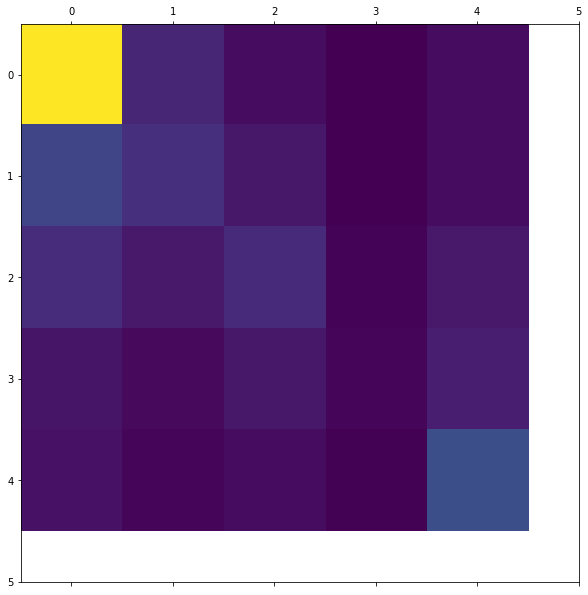

In [24]:
#Code borrowed and modified from Decision Support Systems lab (MIE1513)
cm = confusion_matrix(y_test, y_test_predict)
cm_list.append(cm)
combined_cm = pd.Panel(cm_list).sum(axis=0)
plot_confusion_matrix(combined_cm)

###### Bias - Variance Tradeoff Discussion

The second iteration of the Logistic Regression hyperparameter tuning process yielded the higher average.  The average was 56.31%, indicating that the system had a potentially higher variance, especially when analyzing the 0-10,000 (class 0) salary bucket range.  

The variance relies heavily on the training data, but does not necessarily predict the test data accurately.  In the case of class 0, the variation of data was so widespread, because it holds the greatest population of participants.  When cross-validating, it can be presumed that the majority of class 0's data populated the folds.

Since the variation of data is large, the accuracies predicted in each fold were also larger (ie. in folds 0, 3,, 6, 7, 8, and 9 respectively).

###### Predictability Discussion

In order to understand the predictability of classes, we must first understand how the confusion matrix above works. 
- TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative.
- Accurate predictability can be measured by: (TP + TN)/(TP + FP + TN + FN).  
- Anything in the confusion matrix's diagonal represents a prediction that was true.
- The more colour deviating from dark blue, the more accurate the system is (ie. the system predicted a positive or negative, and it was true).

As displayed in the confusion matrix, it can be determined that a very accurate predictability is found within the 0-10,000 (class 0) salary bucket.  This ultimately makes sense, because the algorithm has been exposed to that particular class which has by far the most amount of participants (from the target_variable output in question 1, there are 7,934 people).

Across the diagonal, the confusion matrix starts to dissipate, and its predicitability becomes worse.  This is because the number of participants in the preceding classes has drastically decreased.  In the 100,000+ salary bucket (class 5) however, it can be concluded that the predictability starts to increase again.

Originally, all 18 salary buckets were used.  This is not a good idea, because as the class number increases, the probability of the machine learning algorithm properly classifying the data decreases.  When the confusion matrix was originally plotted, virtually all of the data had a 0 accuracy return.  As such, it only made sense to combine salary buckets (0-10,000, 10-30,000, 30-60,000, 60-90,000, and 100,000+)

# Question 5: Model Tuning with Grid Search

###### SKLearn Grid Search

The program in the below cell represents the SKLearn method of performing a grid search. Running the code however took too long to process, and so I programmed the grid search process myself.

DO NOT RUN!

In [ ]:
# #Use grid search to determine best parameters with the highest accuracy for Logistic Regression
# #Warning, takes forever to run!
# hyper_parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 
#                     'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
#                     'multi_class':['ovr', 'multinomial', 'auto']}

# grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = hyper_parameters, scoring = 'accuracy')
# grid_search = grid_search.fit(X_train, y_train)

In [25]:
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best accuracy: {grid_search.best_score_}")

### My Programmed Grid Search

This program utilizes a nested for loop to look at both the inverted strength regulizer (c) and multiclass labelizers (mc).  In theory, a smaller C value (ie. 0.001) supports stronger regulization.  Multiclass labelizers vary for both binarized and categorical data (ie. multinomial works for both).

Originally, a solver variable was going to be implemented into the program, however by adding an additional variable into the mix, the program would take a very long time to run. 

In [26]:
#Setting different hyperparameters
c = [0.001, 0.01, 0.1, 1, 10]
mc = ['ovr', 'multinomial']

#Setting lists
train_mean_score = []
test_mean_score = []
avg_list = []
results_list = []

#Testing lists
mean_score_list = []
class_report_list = []

#Training lists
tr_mean_score_list = []
tr_class_report_list = []

#Loop through inverted strength regulizing coefficients
for c_param in c:
    
    #Loop through multiclass labelizers.
    for mc_param in mc:
        
        clf = LogisticRegression(C = c_param, solver='lbfgs', multi_class = mc_param)
        kf_cv = KFold(n_splits = 10)
        kf_cv.get_n_splits(x_pca_data)

        test_mean_score = []
        variance_list = []

        for train_ix, test_ix in kf_cv.split(x_pca_data):

            X_train, X_test = x_pca_data.values[train_ix], x_pca_data.values[test_ix]
            y_train, y_test = target_variable.values[train_ix], target_variable.values[test_ix]

            X_train = StandardScaler().fit_transform(X_train)
            X_test = StandardScaler().fit_transform(X_test)

            clf.fit(X_train, y_train)
            
            y_train_predict = clf.predict(X_train)
            y_test_predict = clf.predict(X_test)
            
            
            train_mean_score.append(round(accuracy_score(y_train, y_train_predict),4))
            test_mean_score.append(round(accuracy_score(y_test, y_test_predict),4))

        #Display all iterations of results
        results = {'C':c_param,'multi_class':mc_param}
        print(results)
        
        #Testing data
        print(f"Printing Test Parameters ----------------------------------------------")
        print(test_mean_score)
        mean_score = round(sum(test_mean_score)/len(test_mean_score),4)
        print(mean_score)
        class_report = classification_report(y_test,y_test_predict)
        print(class_report)
        
        #Training data
        print(f"Printing Train Parameters ----------------------------------------------")
        print(train_mean_score)
        tr_mean_score = round(sum(train_mean_score)/len(train_mean_score),4)
        print(tr_mean_score)
        tr_class_report = classification_report(y_train,y_train_predict)
        print(tr_class_report)
        
        #Append hyperparameter information
        results_list.append(results)
        
        #Appending Train Data
        tr_class_report_list.append(tr_class_report)
        tr_mean_score_list.append(tr_mean_score)
        
        #Appending Test Data
        class_report_list.append(class_report)
        mean_score_list.append(mean_score)
        

{'C': 0.001, 'multi_class': 'ovr'}
Printing Test Parameters ----------------------------------------------
[0.5558, 0.4373, 0.4091, 0.551, 0.4426, 0.458, 0.6211, 0.6539, 0.6539, 0.656]
0.5439
              precision    recall  f1-score   support

       10000       0.87      0.82      0.85      1177
       30000       0.33      0.39      0.36       280
       60000       0.41      0.39      0.40       214
       90000       0.33      0.03      0.05       104
      100000       0.30      0.63      0.41       106

    accuracy                           0.66      1881
   macro avg       0.45      0.45      0.41      1881
weighted avg       0.68      0.66      0.65      1881

Printing Train Parameters ----------------------------------------------
[0.5893, 0.5911, 0.5933, 0.5903, 0.5938, 0.5945, 0.5833, 0.5831, 0.5821, 0.5801]
0.5881
              precision    recall  f1-score   support

       10000       0.63      0.92      0.75      6757
       30000       0.45      0.29      0.35      

###### Accuracy and Hyperparameters

The program calculated the best possible testing accuracy from the grid search to be 56.53%, with C = 0.01 and Multiclass = 'multinomial'.  When comparing this to the best accuracy in Question 4 - Iteration 2 however, (an accuracy of 56.31%, with C = 0.1 and Multiclass = 'ovr') the difference is extremely minimal.

From this, it can be concluded that the grid search method is time consuming and does not provide much of an improvement.  That being said however, this approach was only conducted on the Logistic Regression algorithm, and could prove to be potentially useful with other machine learning algorithms.

In [27]:
def print_train_test():
    
     #Calculating the index position and maximum accuracy
    index, value = max(enumerate(mean_score_list), key=operator.itemgetter(1))
    
    #Test Data
    print(f"Printing Test Data-------------------------------------------------------------------------------")
    #Printing all averages retrieved from each fold
    print(f"Averages of each fold\n{mean_score_list}")
    #Print index pos and accuracy
    print(f"\nIndex Position, Max Value\n{(index,value)}")
    #Print best hyperparameters
    print(f"\nBest Hyperparameters\n{results_list[index]}")
    #Print Metrics
    print(f"\nPerformance Metrics\n{class_report_list[index]}")
    
    avg = round(sum(tr_mean_score_list)/len(tr_mean_score_list),4)
    #Train Data
    print(f"Printing Train Data------------------------------------------------------------------------------")
    #Printing all averages retrieved from each fold
    print(f"Averages of each fold\n{tr_mean_score_list}")
    #Print index pos and accuracy
    print(f"\nIndex Position, Max Value\n{(index,avg)}")
    #Print metrics
    print(f"\nPerformance Metrics\n{tr_class_report_list[index]}")

In [28]:
print_train_test()

Printing Test Data-------------------------------------------------------------------------------
Averages of each fold
[0.5439, 0.5535, 0.5591, 0.5617, 0.5594, 0.5628, 0.5594, 0.5628, 0.5595, 0.5628]

Index Position, Max Value
(5, 0.5628)

Best Hyperparameters
{'C': 0.1, 'multi_class': 'multinomial'}

Performance Metrics
              precision    recall  f1-score   support

       10000       0.92      0.76      0.83      1177
       30000       0.33      0.35      0.34       280
       60000       0.34      0.42      0.37       214
       90000       0.23      0.21      0.22       104
      100000       0.28      0.65      0.39       106

    accuracy                           0.62      1881
   macro avg       0.42      0.48      0.43      1881
weighted avg       0.69      0.62      0.65      1881

Printing Train Data------------------------------------------------------------------------------
Averages of each fold
[0.5881, 0.5931, 0.5971, 0.6008, 0.6022, 0.6041, 0.6047, 0.6058, 0.

###### Precision, Recall & F1 Metrics

- Precision refers to the number of times a class was accurately identified in the prediction out of all classes.
- Recall refers to the number of class samples that the model found and accurately predicted to be correct.  
- F1 is a method used to measure both precision and recall, and is therefore dependant on the outcome of both.

In the above optimized grid search model, class 0 has the highest precision and recall (92% and 74%, respectively).  This makes sense, since it contains the most amount of data of all other classes.  Since the precision is much higher however, this indicates that there is a lower false positive rate than false negative.

Both precision and recall drastically decrease for the other classes.  In Question 4 where the confusion matrix was plotted, it is very easy to tell that the predictability for all other classes is not nearly as supported as so for class 0.  As such, it makes sense to see these low figures.

There are a few options however, to improve the precision and recall of each class.  If each class had more participants on par with those of class 0, it would have more data evenly distributed for a fair evaluation.  Alternatively, some of the participants could be deleted from class 0.  This however is not recommended, because randomly deleting data for the analysis may result in skewing the figures.  One potential method of optimizing the model could be to use a One-Vs-Rest Classification.

### One-Vs-Rest Classification

Another potential method for optimizing the Logistic Regression model is to implement a One-Vs-Rest solution.  Essentially, this will binarize each class label as opposed to analyzing them as different categories.  For example, if we're specifically analyzing Class 0, it will assign this class a 1 and all other classes 0's.  

This could prove to be useful, because it will potentially allow the system to gain insight on each individual classifier, one at a time.  It is a very common method of approach, especially for n-number of classes > 2.  

In [31]:
#Code borrowed from Tutorial 3: Multiclass Classification and Evaluation Metrics
bin_target_variable = target_variable.astype('category')
bin_y = label_binarize(bin_target_variable, classes=bin_target_variable.cat.categories)
bin_y

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_data, bin_y, test_size=0.3, random_state=100)
opt_clf = OneVsRestClassifier(LogisticRegression())
opt_clf.fit(X_train, y_train)

y_test_predict = opt_clf.predict(X_test)
y_score = opt_clf.decision_function(X_test)
class_report = classification_report(y_test,y_test_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2315
           1       0.47      0.10      0.17      1017
           2       0.48      0.06      0.11       929
           3       0.29      0.02      0.05       568
           4       0.68      0.46      0.55       817

   micro avg       0.76      0.42      0.54      5646
   macro avg       0.55      0.29      0.34      5646
weighted avg       0.63      0.42      0.46      5646
 samples avg       0.42      0.42      0.42      5646



C:\Users\mvass\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


###### Plotting the ROC Curve

Plotting the ROC curve will present a visualization on measuring Recall against the probability of false positives.

In [33]:
TPR, FPR, AUC = {}, {}, {}

for i in range(len(bin_target_variable.cat.categories)):
    FPR[i], TPR[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    AUC[i] = auc(FPR[i], TPR[i])

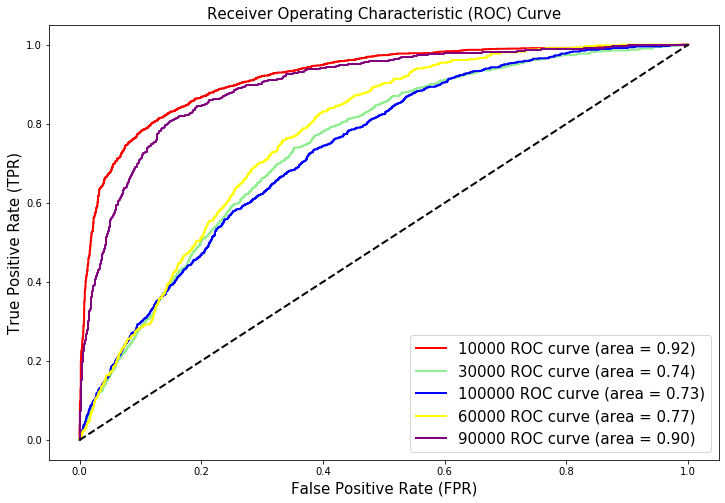

In [34]:
plt.figure(figsize=(12,8))
colors = ['red','lightgreen','blue','yellow','purple']

try:
    for i in range(len(bin_target_variable.unique())):
        plt.plot(FPR[i], TPR[i], color=colors[i], lw=2, label='%s ROC curve (area = %0.2f)' % (bin_target_variable.unique()[i],AUC[i]))
except:
    print("")

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)', fontsize=15)
plt.ylabel('True Positive Rate (TPR)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
plt.legend(loc=4, fontsize=15)

###### ROC Curve Results

Plotting the ROC curve and analyzing the metrics above, it can be seen that the recall has improved for class 0, but decreased for all other classes.  Conversely however, all classes experienced an increase in precision except for class 0, which decreased.  This tends to make sense, because precision and recall have been shown to be inversely proportional.   

# Question 6: Testing & Discussion

###### Discussion of Optimal Model
In the end, the most optimal choice between the 2 hyperparameter tuning models from Question 4, the GridSearchCV model, and the OVR classification model from Question 5, resulted in the grid search method.  

While each class improved in precision using OVR, the grid search had a more even distribution of recall and precision across each class.  While the OVR method would return less results with higher accuracy, precision isn't the only important factor here.  



In [35]:
print_train_test()

Printing Test Data-------------------------------------------------------------------------------
Averages of each fold
[0.5439, 0.5535, 0.5591, 0.5617, 0.5594, 0.5628, 0.5594, 0.5628, 0.5595, 0.5628]

Index Position, Max Value
(5, 0.5628)

Best Hyperparameters
{'C': 0.1, 'multi_class': 'multinomial'}

Performance Metrics
              precision    recall  f1-score   support

       10000       0.92      0.76      0.83      1177
       30000       0.33      0.35      0.34       280
       60000       0.34      0.42      0.37       214
       90000       0.23      0.21      0.22       104
      100000       0.28      0.65      0.39       106

    accuracy                           0.62      1881
   macro avg       0.42      0.48      0.43      1881
weighted avg       0.69      0.62      0.65      1881

Printing Train Data------------------------------------------------------------------------------
Averages of each fold
[0.5881, 0.5931, 0.5971, 0.6008, 0.6022, 0.6041, 0.6047, 0.6058, 0.

###### Discussion of Train and Test Data
As seen from the data above, the train accuracy was marginally better (only by about 3% - Test: 56.48%, Train: 59.78%).  This is to be expected, as the model uses the training to data to predict the outcome of the test.

The training data also had a more even distribution between precision and recall.

###### Plotting the Training and Testing Accuracies in the GridSearchCV
The code below was copied, pasted and defined as a function from the GridSearchCV section in Question 5.  It is used here to capture training and testing averages across each hyperparameter (C value).

In [36]:
def grid_search(X, y):

    #Setting different hyperparameters
    c = [0.001, 0.01, 0.1, 1, 10]
    mc = ['ovr', 'multinomial']

    append_param = []

    #Setting lists
    train_mean_score = []
    test_mean_score = []
    avg_list = []
    results_list = []
    param_list = []

    #Testing lists
    mean_score_list = []
    class_report_list = []
    test_avg = []

    #Training lists
    tr_mean_score_list = []
    tr_class_report_list = []
    train_avg = []

    #Loop through inverted strength regulizing coefficients
    for c_param in c:

        #Loop through multiclass labelizers.
        for mc_param in mc:

            clf = LogisticRegression(C = c_param, solver='lbfgs', multi_class = mc_param)
            kf_cv = KFold(n_splits = 10)
            kf_cv.get_n_splits(x_pca_data)

            test_mean_score = []
            variance_list = []

            for train_ix, test_ix in kf_cv.split(x_pca_data):

                X_train, X_test = x_pca_data.values[train_ix], x_pca_data.values[test_ix]
                y_train, y_test = target_variable.values[train_ix], target_variable.values[test_ix]

                X_train = StandardScaler().fit_transform(X_train)
                X_test = StandardScaler().fit_transform(X_test)

                clf.fit(X_train, y_train)

                y_train_predict = clf.predict(X_train)
                y_test_predict = clf.predict(X_test)

                train_mean_score.append(round(accuracy_score(y_train, y_train_predict),4))
                test_mean_score.append(round(accuracy_score(y_test, y_test_predict),4))

            mean_score = round(sum(test_mean_score)/len(test_mean_score),4)
            tr_mean_score = round(sum(train_mean_score)/len(train_mean_score),4)

        train_avg.append(tr_mean_score)
        test_avg.append(mean_score)
        append_param.append(c_param)

    result_df = pd.DataFrame(zip(append_param, train_avg, test_avg),columns =['c_value', 'train_avg','test_avg'])

    assert isinstance(result_df, pd.DataFrame), "return type"
    return result_df

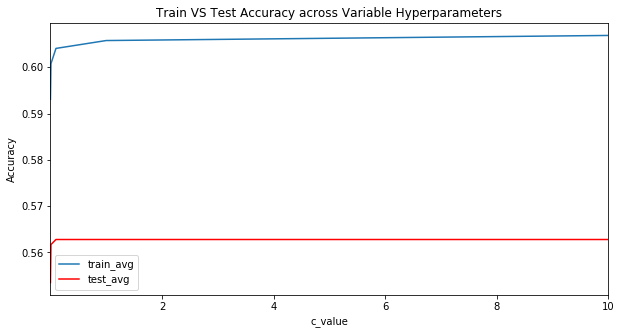

In [37]:
#Code borrowed and modified from MIE1513.
param_df = grid_search(x_pca_data, target_variable)
ax = plt.gca()
fig =plt.gcf()
fig.set_size_inches(10, 5)
param_df.plot(kind='line',x='c_value',y='train_avg',ax=ax)
param_df.plot(kind='line',x='c_value',y='test_avg', color = 'red',ax=ax)
plt.title('Train VS Test Accuracy across Variable Hyperparameters')
plt.ylabel('Accuracy')
plt.show()

In [38]:
param_df.head()

,c_value,train_avg,test_avg
0,0.001,0.5931,0.5535
1,0.010,0.6008,0.5617
2,0.100,0.6041,0.5628
3,1.000,0.6058,0.5628
4,10.000,0.6069,0.5628


###### Overfitting
The GridSearchCV train and test accuracy were plotted to show the relationship as the values changed over the hyperparameter tuning.  From the plot, there appears to be slight overfitting.  This is is however, very minimal as there is only a difference of approximately 4%.  

The overfitting could be a result of too much noise in the training set.  The data has much exposure to class 0, but not enough to the other classes.  As a result, variability is biased towards class 0.